In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

# mount google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
# import gensim word2vec api and use the training dataset "word2vec-google-news-300"
import gensim.downloader as api
word2vec = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [70]:
# define the function to plot graph
def tsne_plot(model, filename):
  labels = []
  wordvecs = []

  for word in vocab:
    wordvecs.append(model[word])
    labels.append(word)
  
  tsne_model = TSNE(perplexity= perplexity_lv, n_components= 2, init="pca", random_state=8)
  coordinates = tsne_model.fit_transform(wordvecs)

  x = []
  y = []
  for value in coordinates:
    x.append(value[0])
    y.append(value[1])

  cmap = cm.get_cmap('bwr') # hot, plasma, Reds
  # color_list_norm = [1-(float(i)-min(color_list))/(max(color_list)-min(color_list)) for i in color_list]
  color_list_rank = color_list.rank()
  color_list_norm = color_list_rank / len(color_list_rank)
  colors_norm = cmap(color_list_norm)

  plt.figure(figsize= (64,36))
  for i in range(len(x)):
    plt.scatter(x[i],y[i],s=size_list[i], c=colors_norm[i].reshape(1,-1))
    if color_list_norm[i] > 0.90:
      plt.annotate(labels[i],
                  xy= (x[i],y[i]),
                  xytext= (4,4),
                  textcoords= "offset points",
                  fontsize = 18,
                  ha= "right",
                  va= "bottom")
    else:
      plt.annotate(labels[i],
                  xy= (x[i],y[i]),
                  xytext= (4,4),
                  textcoords= "offset points",
                  fontsize = 8,
                  ha= "right",
                  va= "bottom")
  plt.colorbar(cm.ScalarMappable(cmap='bwr'))
  plt.savefig("/content/gdrive/My Drive/Colab Notebooks/colab_result/" + filename)
  plt.show()


In [7]:
# output df_topic_unique_selected.csv for data_processing.ipynb

df_topic_unique = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/output/df_topic_unique.csv")

word2vec_topic = []
for i in range(len(df_topic_unique)):
  y = df_topic_unique["topic"][i]
  for index, word in enumerate(word2vec.index2word):
    if word == y:
      word2vec_topic.append(word)

df_topic_unique_selected = pd.DataFrame({"topic": word2vec_topic})
df_topic_unique_selected.to_csv("/content/gdrive/My Drive/Colab Notebooks/colab_result/df_topic_unique_selected.csv", index = False)

In [5]:
# read the dataset after data processing
df_topic_final_views_avg = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/output/df_topic_final_views_avg.csv")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


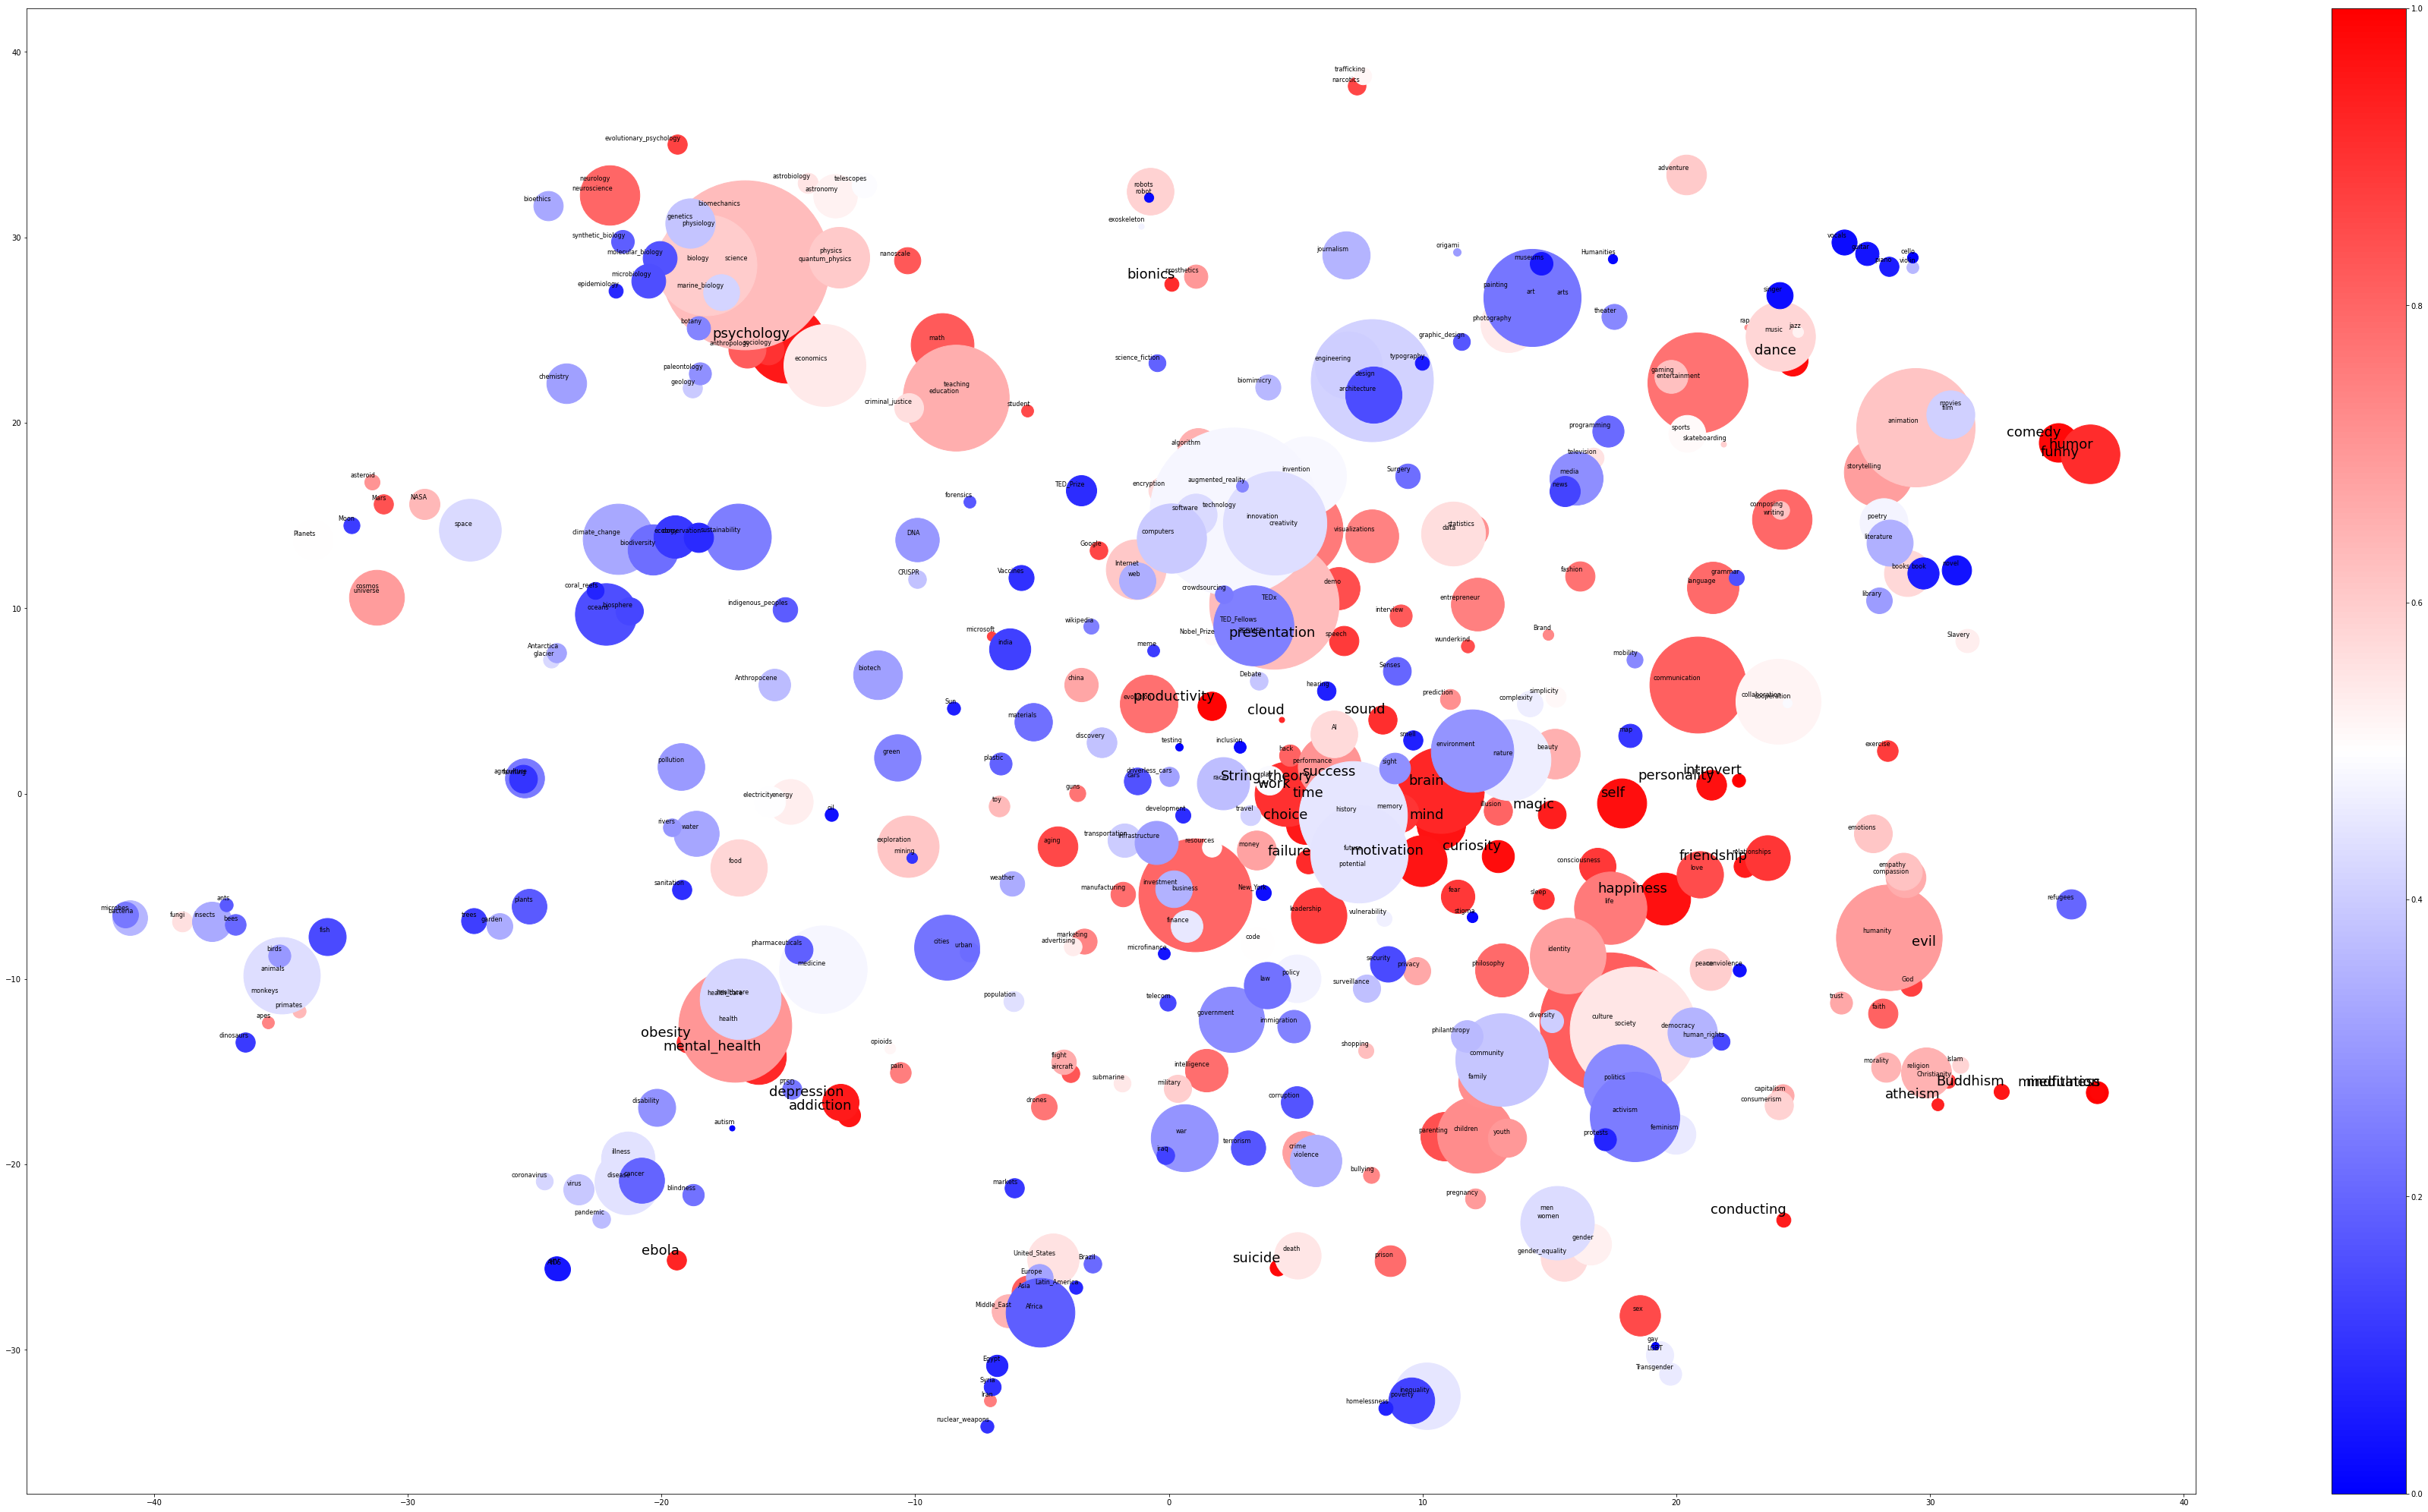

In [75]:
# plot using color = views_avg, size = topic_count
vocab = df_topic_final_views_avg["topic"]
color_list = df_topic_final_views_avg["views_avg"]
size_list = df_topic_final_views_avg["topic_count"] * 50
perplexity_lv = 8
tsne_plot(word2vec, "plot_views.pdf")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


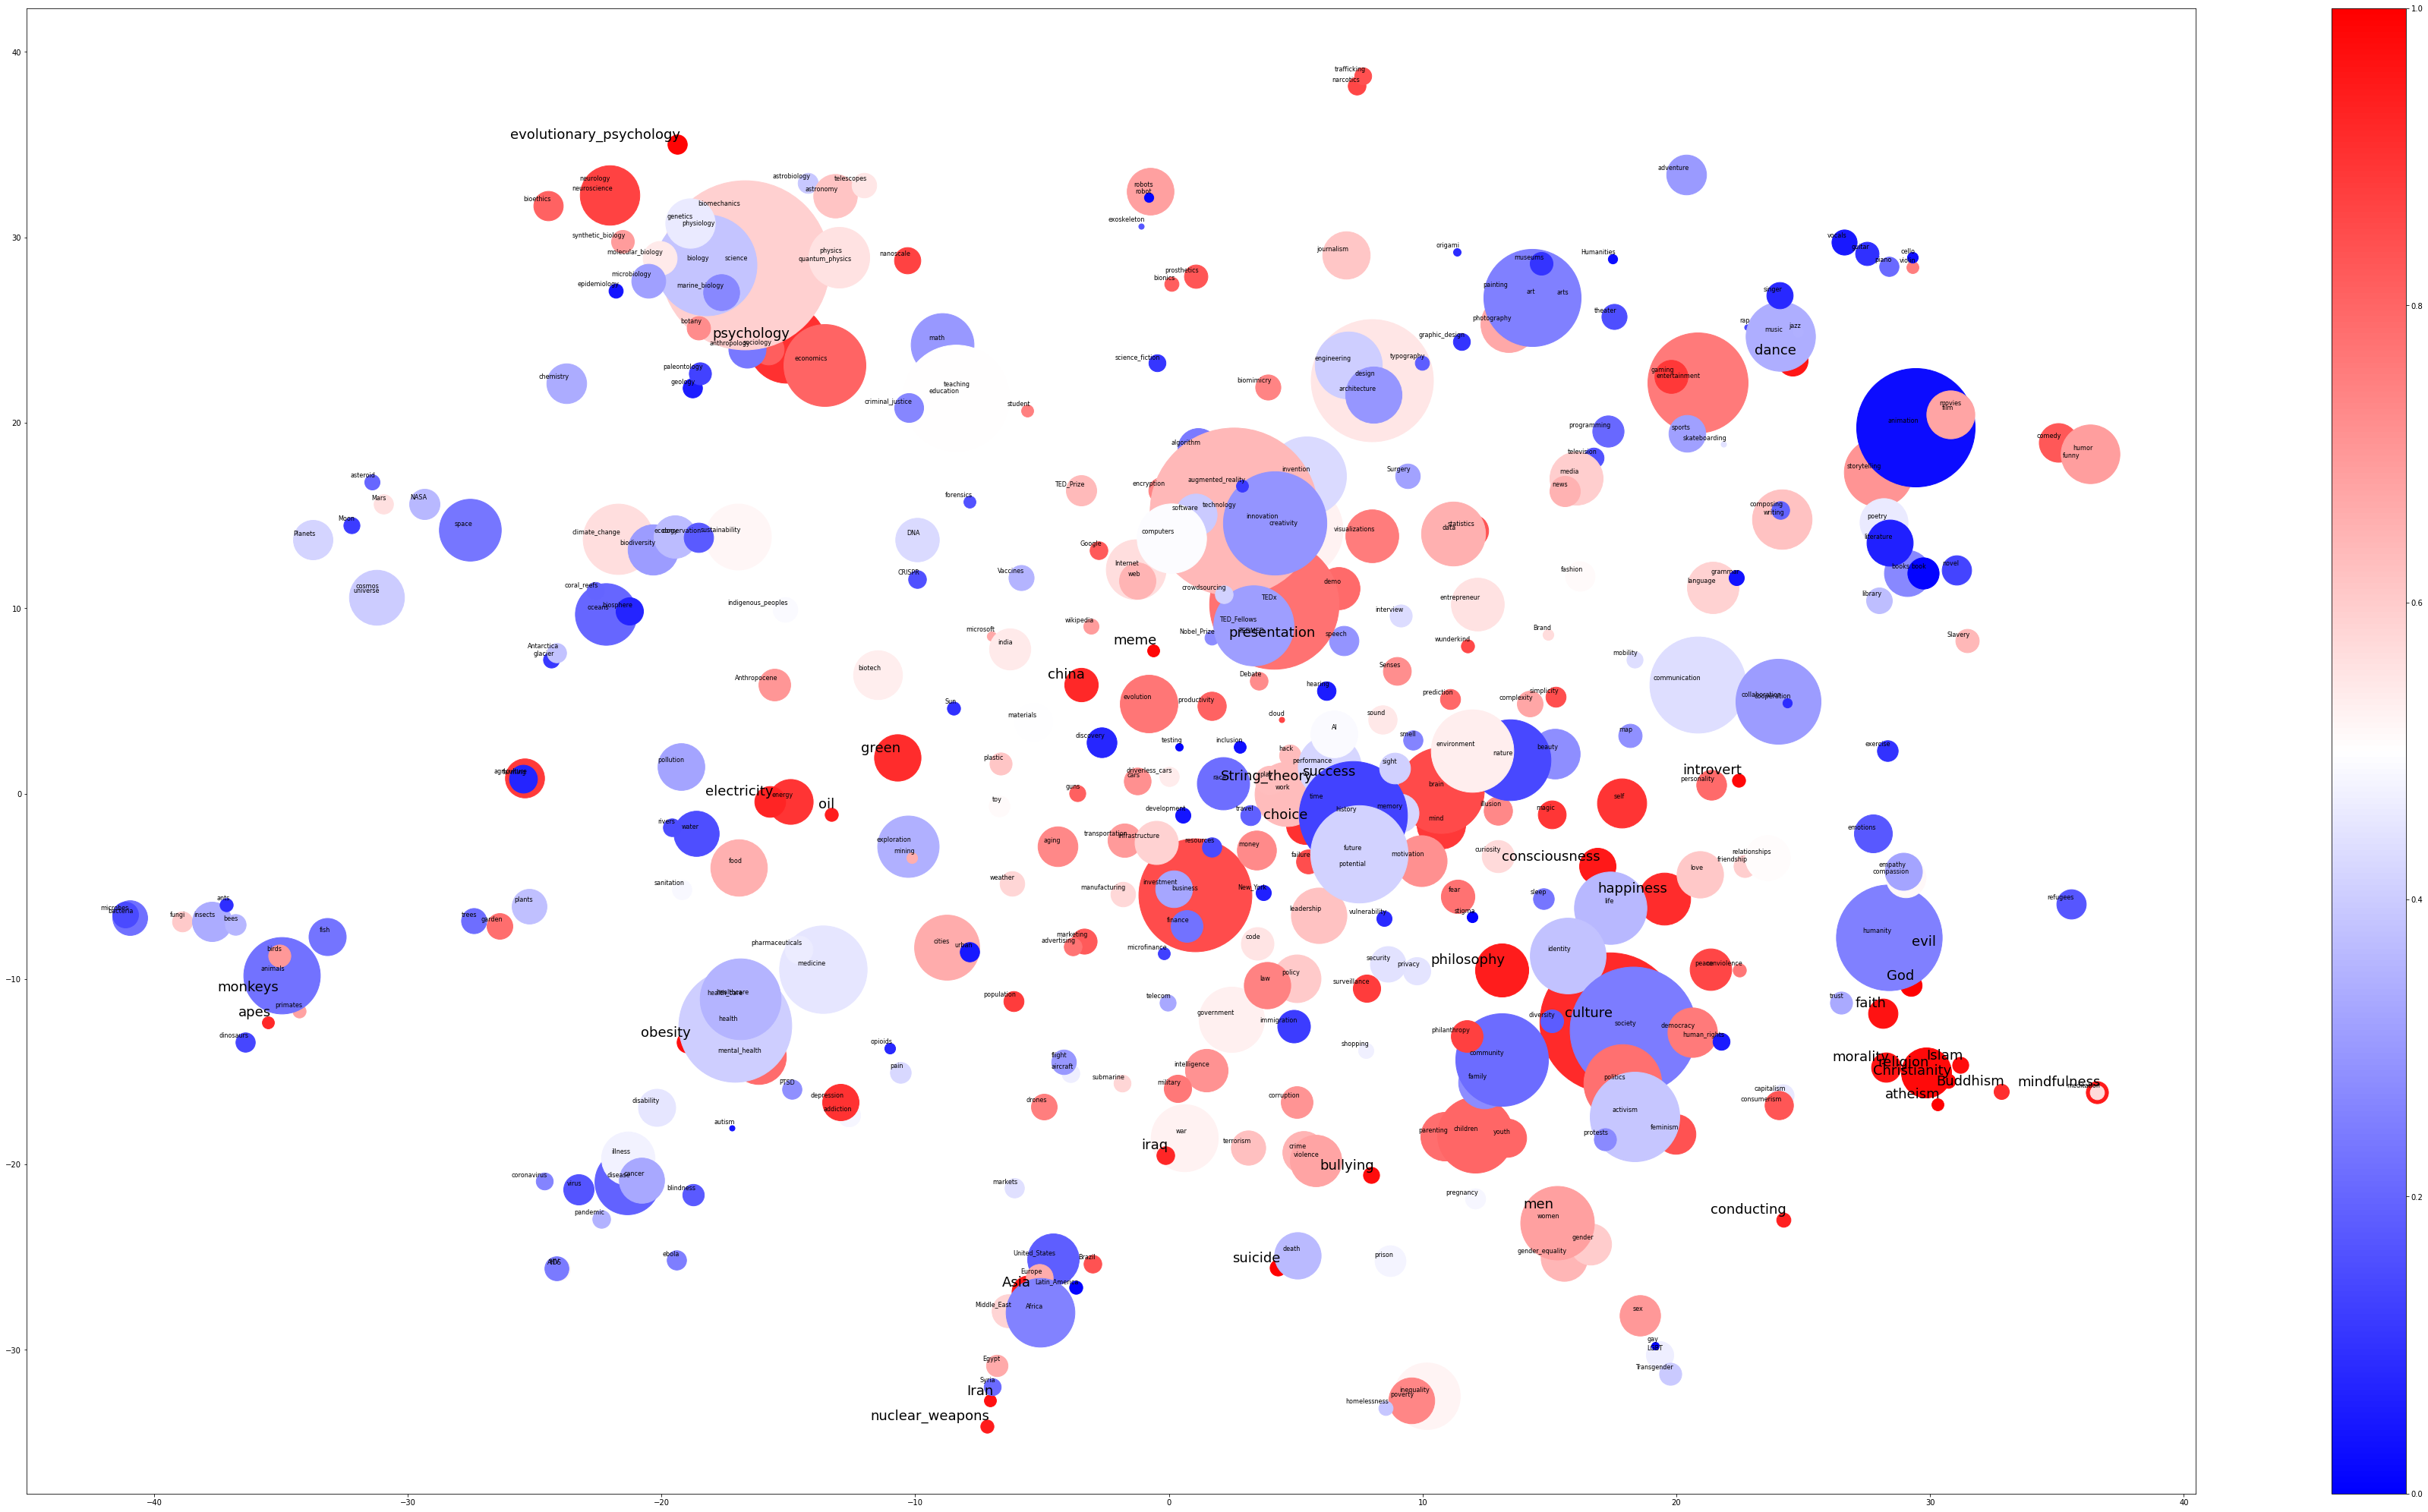

In [76]:
# plot using color = comments_avg, size = topic_count
vocab = df_topic_final_views_avg["topic"]
color_list = df_topic_final_views_avg["comments_avg"]
size_list = df_topic_final_views_avg["topic_count"] * 50
perplexity_lv = 8
tsne_plot(word2vec, "plot_comments.pdf")